<a href="https://colab.research.google.com/github/PauloDiass/RegressaoLinear_Iris/blob/main/regessaoLineardataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns

In [ ]:
import kagglehub
path = kagglehub.dataset_download("uciml/iris")

Using Colab cache for faster access to the 'iris' dataset.


In [ ]:
# base = pd.read_csv('mt_cars.csv')
base = pd.read_csv(path + '/Iris.csv')
base.shape

(150, 6)

In [15]:
base.sample(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
109,110,7.2,3.6,6.1,2.5,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
31,32,5.4,3.4,1.5,0.4,Iris-setosa
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
120,121,6.9,3.2,5.7,2.3,Iris-virginica
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
79,80,5.7,2.6,3.5,1.0,Iris-versicolor


In [17]:
base = base.drop(['Id'], axis=1)

In [16]:
#corr = base.corr()
# sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
corr = base.drop('Id', axis=1).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

ValueError: could not convert string to float: 'Iris-setosa'

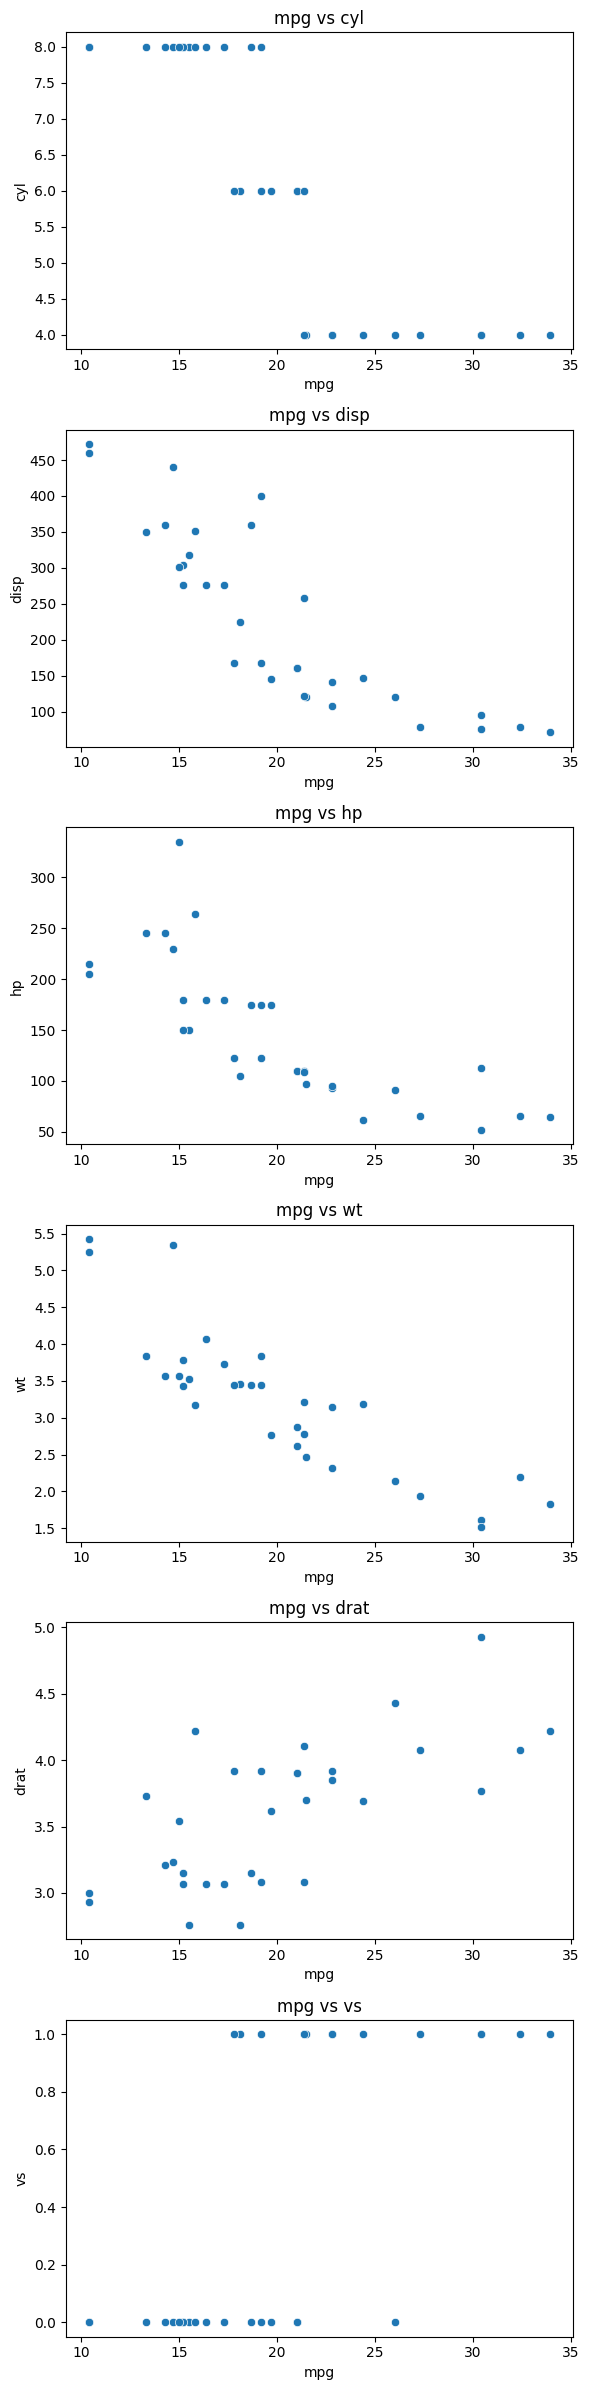

In [ ]:
column_pairs = [
    ('mpg', 'cyl'),
    ('mpg', 'disp'),
    ('mpg', 'hp'),
    ('mpg', 'wt'),
    ('mpg', 'drat'),
    ('mpg', 'vs')]
n_plots = len(column_pairs)
fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6,4 * n_plots))

for i, pair in enumerate(column_pairs):
    x_col, y_col = pair
    sns.scatterplot(x=x_col, y=y_col, data=base, ax=axes[i])
    axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()

In [ ]:
# aic 156.6 bic 162.5
# modelo = sm.ols(formula='mpg ~ wt + disp + hp', data=base)

# aic 165.1 bic 169.5
# modelo = sm.ols(formula='mpg ~ disp + cyl', data=base)

modelo = sm.ols(formula='mpg ~ drat + vs', data=base)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           5.82e-07
Time:                        00:47:55   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.7

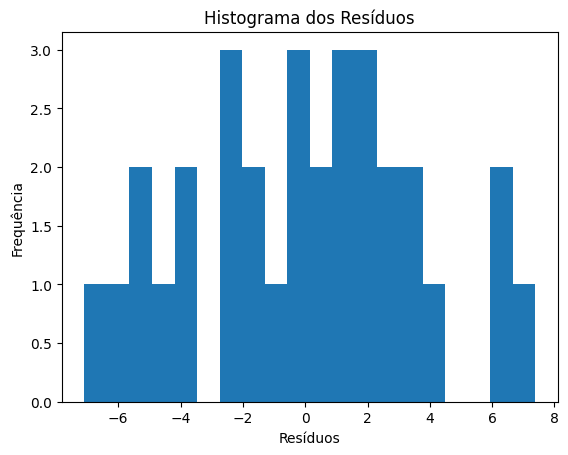

In [ ]:
residuos = modelo.resid
plt.hist(residuos, bins=20)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

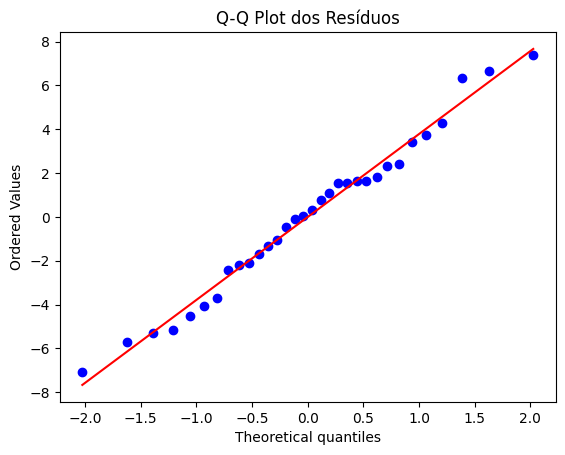

In [ ]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Resíduos')
plt.show()

In [ ]:
#h0 (hipotese nula) - dados estão normalmente distribuidos
# p <= 0.05 rejeito a hipotese nula, (não estão normalmente distribuidos)
# p > 0.05 não eh possivel rejeitar a hipotese nula

stat, pval = stats.shapiro(residuos)
print(f'Estatística de teste: {stat:.3f}')
print(f'Valor-p: {pval:.3f}')

Estatística de teste: 0.981
Valor-p: 0.822
